In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

In [6]:
dataset=pd.read_csv("Logistic_Regression_Binary_Classsification_Churn_Data.csv")

In [7]:
dataset.keys()

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
churn1=pd.get_dummies(dataset["Churn"],drop_first=True)
churn1.head()

,Yes
0,0
1,0
2,1
3,0
4,1


In [82]:
PS=pd.get_dummies(dataset["PhoneService"],drop_first=True)
PS.head()

,Yes
0,0
1,1
2,1
3,0
4,1


In [83]:
Con=pd.get_dummies(dataset["Contract"],drop_first=True)
Con.head()

,One year,Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [85]:
PB=pd.get_dummies(dataset["PaperlessBilling"],drop_first=True)
PB.head()

,Yes
0,1
1,0
2,1
3,0
4,1


In [86]:
PM=pd.get_dummies(dataset["PaymentMethod"],drop_first=True)
PM.head()

,Credit card (automatic),Electronic check,Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [93]:
result = pd.concat([dataset.tenure,churn1,PS,Con,PB,PM,dataset.MonthlyCharges,dataset.TotalCharges], axis=1)
result.head()

,tenure,Yes,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check,MonthlyCharges,TotalCharges
0,1,0,0,0,0,1,0,1,0,29.85,29.85
1,34,0,1,1,0,0,0,0,1,56.95,1889.5
2,2,1,1,0,0,1,0,0,1,53.85,108.15
3,45,0,0,1,0,0,0,0,0,42.30,1840.75
4,2,1,1,0,0,1,0,1,0,70.70,151.65


In [113]:
x= result.iloc[:,[0,2,3,4,5,6,7,8,9]].values#all column except Churn and TotalCharges
y=result.iloc[:,1].values #churn column
y.shape

(7043,)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [103]:
logreg = LogisticRegression()

In [104]:
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
predictions = logreg.predict(x_test)

In [106]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [107]:
confusion_matrix(y_test, predictions)

array([[1190,  144],
       [ 201,  226]], dtype=int64)

In [108]:
precision_score(y_test, predictions)

0.6108108108108108

In [109]:
recall_score(y_test, predictions)

0.5292740046838408

In [110]:
f1_score(y_test, predictions)

0.5671267252195733

In [111]:
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

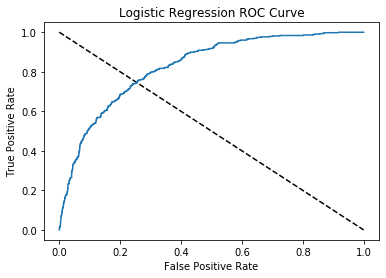

In [112]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logitic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()